In [1]:
#install.packages("tidyverse") # si no lo tienes
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
url_template = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/05-%02d-2020.csv'

In [3]:
dates <- seq(from = 1, to = 19)#'05-1-2020'
l <- vector("list", length(dates))
for (i in dates) {
    url <- sprintf(url_template, i)
    data <- read_csv(url, col_types = cols())
    data <- add_column(data, day=i)
    l[[i]] <- data
}
all_data <- bind_rows(l)

In [4]:
CA = c('Mexico', 'Belize', 'Guatemala', 'El Salvador', 'Honduras', 'Nicaragua', 'Costa Rica', 'Panama')

(all_data %>% 
    group_by(Country_Region,day) %>% 
    summarise(Confirmed=sum(Confirmed)) %>%
    filter(Country_Region %in% CA)) -> line_data

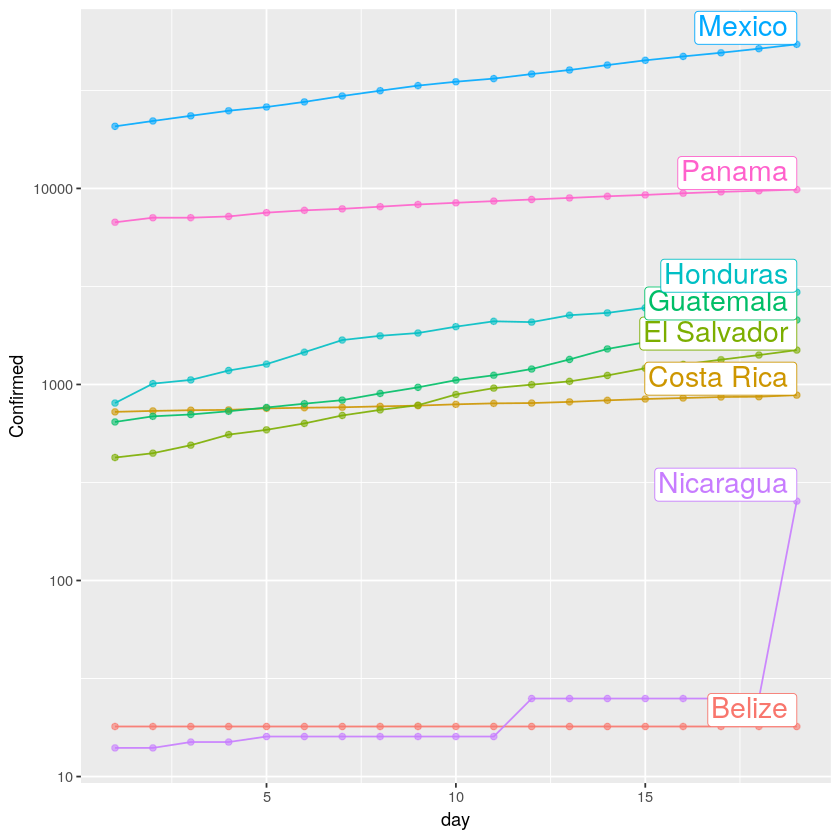

In [24]:
library(repr)
options(repr.plot.width=NULL, repr.plot.height=NULL) # use defaults

ggplot(line_data, mapping = aes(x = day, y = Confirmed, color = Country_Region)) + 
    geom_line(alpha=.9) + 
    geom_point(alpha=.6) + 
    geom_label(line_data %>% filter(day==19), mapping = aes(label=Country_Region), vjust=0, hjust=1, size=6) +
    scale_y_log10() + 
    theme(legend.position = "none")

In [6]:
data <- l[[19]]

In [7]:
#!conda install r-magick

Linking to ImageMagick 7.0.10.10
Enabled features: cairo, fontconfig, freetype, fftw, pango, rsvg, webp, x11
Disabled features: ghostscript, lcms



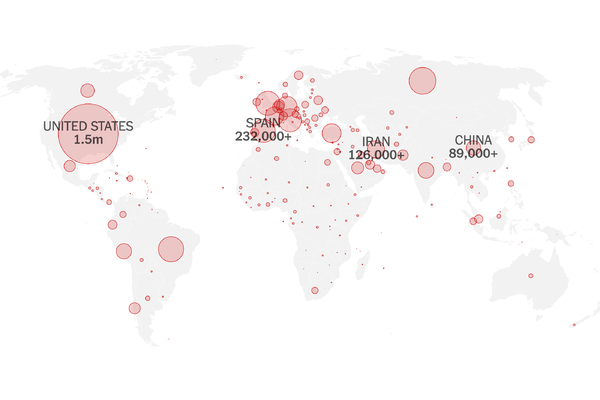

# A tibble: 1 x 7
  format width height colorspace matte filesize density
  <chr>  <int>  <int> <chr>      <lgl>    <int> <chr>  
1 PNG      600    400 sRGB       TRUE     72546 +72x+72


In [8]:
library(magick)
nyt <- image_read('https://static01.nyt.com/images/2020/03/03/world/coronavirus-map-promo/coronavirus-map-promo-articleLarge-v424.png')
show(nyt)

In [9]:
data %>% filter(!(is.na(Lat) | is.na(Confirmed))) %>%
         group_by(Province_State,Country_Region) %>%
         summarise(Confirmed=sum(Confirmed), Lat=mean(Lat), Long_=mean(Long_)) -> agg_data

In [10]:
agg_data %>% head(10)

Province_State,Country_Region,Confirmed,Lat,Long_
<chr>,<chr>,<dbl>,<dbl>,<dbl>
Abruzzo,Italy,3197,42.35122,13.39844
Alabama,US,12376,32.88428,-86.71012
Alaska,US,399,60.39546,-145.39795
Alberta,Canada,6716,53.93330,-116.57650
Andalusia,Spain,12471,37.54430,-4.72780
Anguilla,United Kingdom,3,18.22060,-63.06860
Anhui,China,991,31.82570,117.22640
Aragon,Spain,5520,41.59760,-0.90570
Arizona,US,14576,33.67590,-111.46323


In [11]:
library(ggmap)
world <- c(left = -170, bottom = -60, right = 170, top = 80)
background <- get_stamenmap(world, zoom = 2, maptype = "toner-background")

Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.

Please cite ggmap if you use it! See citation("ggmap") for details.

Source : http://tile.stamen.com/toner-background/2/0/0.png

Source : http://tile.stamen.com/toner-background/2/1/0.png

Source : http://tile.stamen.com/toner-background/2/2/0.png

Source : http://tile.stamen.com/toner-background/2/3/0.png

Source : http://tile.stamen.com/toner-background/2/0/1.png

Source : http://tile.stamen.com/toner-background/2/1/1.png

Source : http://tile.stamen.com/toner-background/2/2/1.png

Source : http://tile.stamen.com/toner-background/2/3/1.png

Source : http://tile.stamen.com/toner-background/2/0/2.png

Source : http://tile.stamen.com/toner-background/2/1/2.png

Source : http://tile.stamen.com/toner-background/2/2/2.png

Source : http://tile.stamen.com/toner-background/2/3/2.png



In [12]:
## set figure size
library(repr)

f = 9
width=2*f
height=f
options(repr.plot.width=width, repr.plot.height=height)

In [13]:
(agg_data %>% 
    group_by(Country_Region) %>% 
    summarise(Confirmed=sum(Confirmed), Lat=median(Lat), Long_=median(Long_))) -> country_agg

(country_agg %>% 
     filter(Country_Region %in% c()) %>% # mean coords for UK place it in the atlantic
     arrange(desc(Confirmed)) %>% 
     head(5)) -> top5

Warning message:
“Removed 2 rows containing missing values (geom_point).”


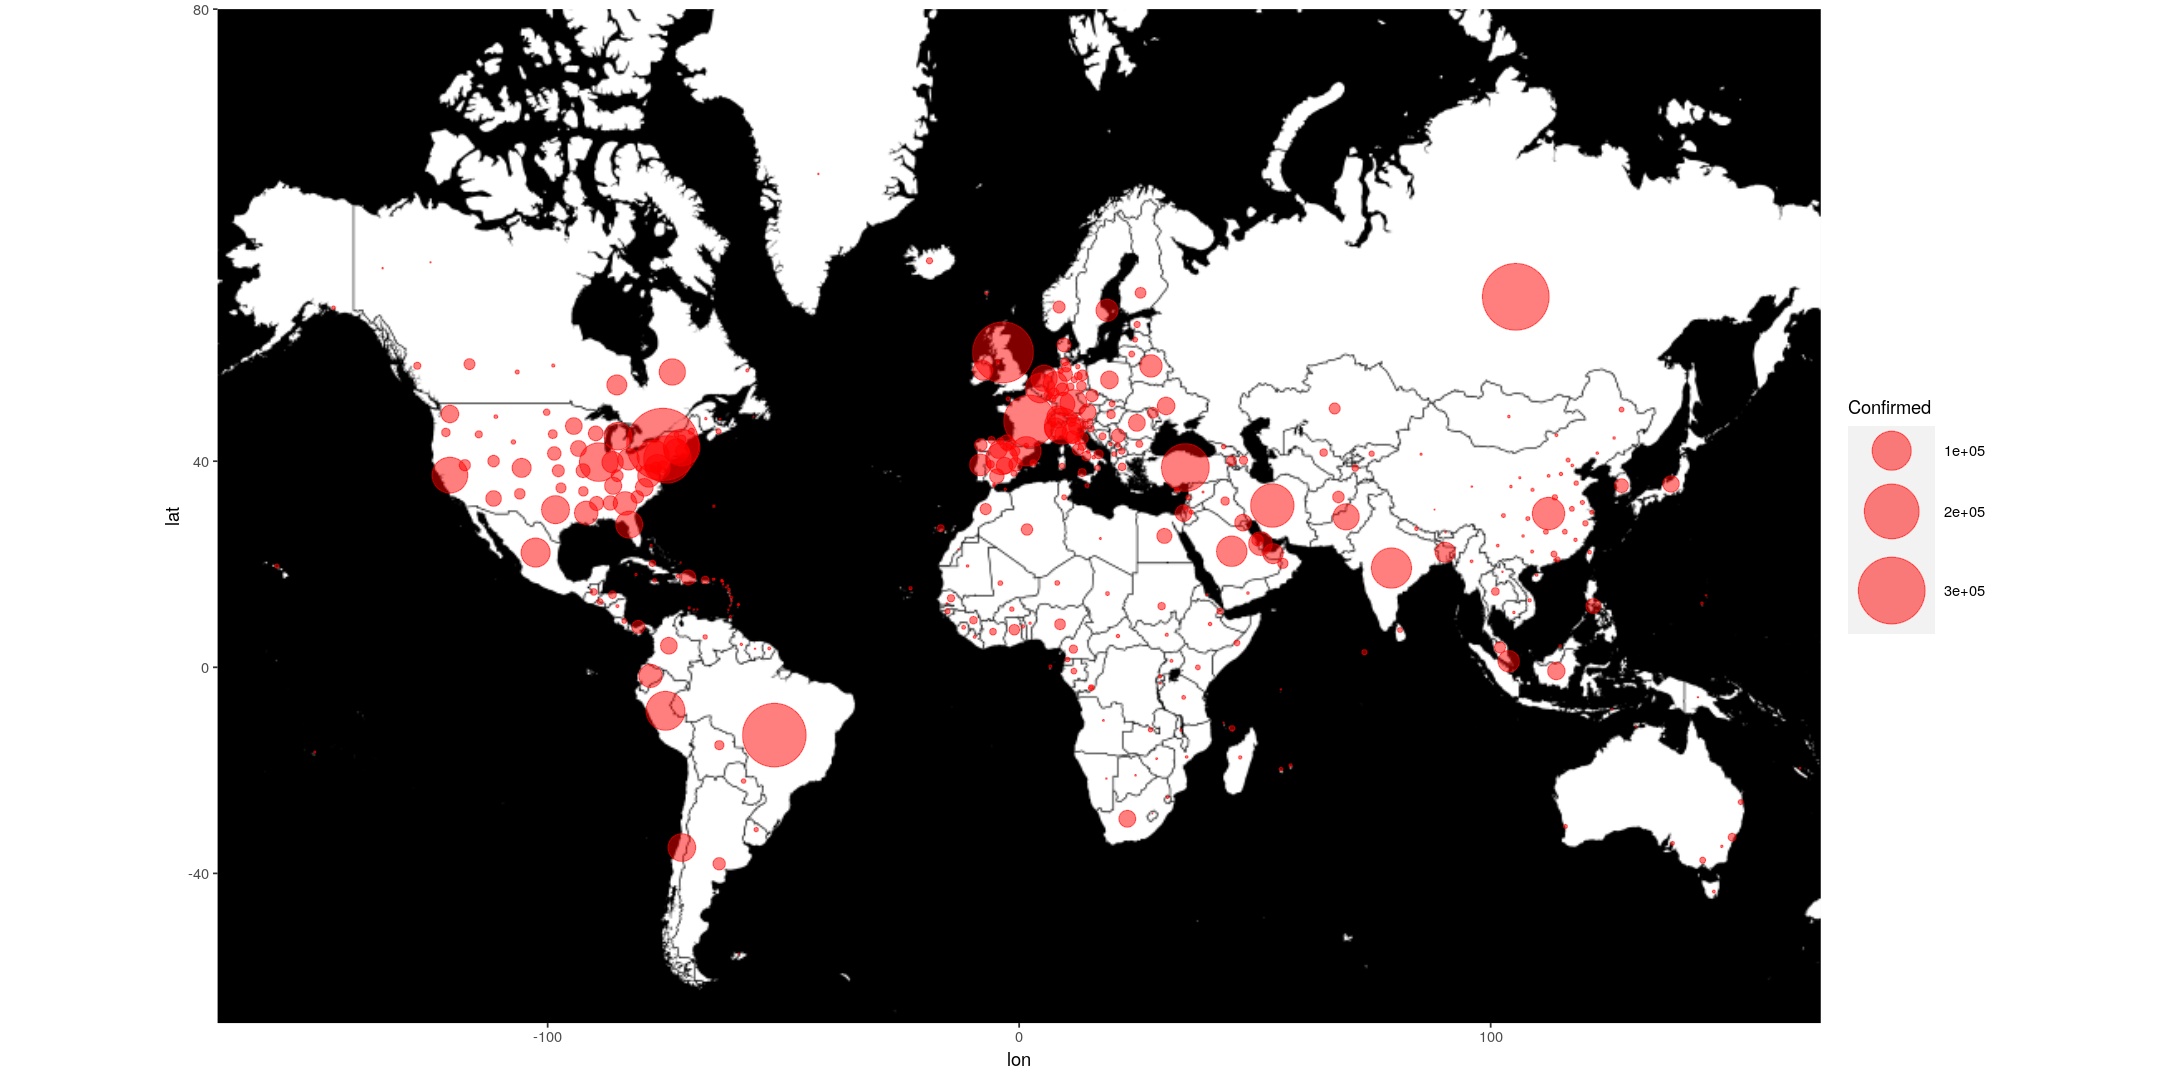

In [14]:
ggmap(background) +
    geom_point(data=agg_data, aes(x=Long_, y=Lat, size=Confirmed), color='red', alpha=.5) +
    scale_size(range = c(0,20))